On This part of our project we will analyze the most affordable type of houses , and the most affordable neighborhood.



In [8]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [9]:
from dotenv import load_dotenv

In [10]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")


In [16]:
# Import the CSVs to Pandas DataFrames
GTA_path = Path("Data/toronto_neighbourhoods_census_data.csv")
GTA_data = pd.read_csv(GTA_path, index_col="Date")
GTA_data.head()

,year,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,,
Agincourt North,2001,3715,1480,0,1055,1295,195,185,5,200388,810,870
Agincourt South-Malvern West,2001,3250,1835,0,545,455,105,425,0,203047,806,892
Alderwood,2001,3175,315,0,470,50,185,370,0,259998,817,924
Annex,2001,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
Banbury-Don Mills,2001,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [31]:
# Getting the data from the top 10 cheaper neighbourhoods
cheaper_neighbourhoods = GTA_data.groupby(by="neighbourhood").mean()
cheaper_neighbourhoods.reset_index(inplace=True)
cheaper_neighbourhoods.sort_values(by="average_house_value", ascending=True , inplace=True)
cheaper_neighbourhoods.head(10)


,neighbourhood,year,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
42,Flemingdon Park,2008.5,5.00,6368.75,0.00,182.50,630.00,3.75,591.25,0.00,207799.00,1199.75,973.00
115,Taylor-Massey,2008.5,622.50,4795.00,0.00,203.75,216.25,150.00,218.75,15.00,239414.00,1129.25,919.25
81,Mount Olive-Silverstone-Jamestown,2008.5,1730.00,5916.25,1.25,176.25,1033.75,603.75,127.50,1.25,253182.25,1159.50,955.25
118,Thorncliffe Park,2008.5,3.75,6318.75,0.00,0.00,141.25,0.00,187.50,5.00,255264.75,1304.25,1088.50
73,Malvern,2008.5,3693.75,2982.50,0.00,1317.50,3410.00,878.75,552.50,55.00,256880.25,1228.00,998.75
13,Black Creek,2008.5,732.50,4356.25,0.00,685.00,1116.25,113.75,238.75,2.50,260841.75,1011.75,864.50
31,Dorset Park,2008.5,2106.25,3743.75,0.00,326.25,1318.75,405.00,413.75,3.75,262000.25,1152.25,953.50
80,Mount Dennis,2008.5,1028.75,2238.75,0.00,138.75,302.50,176.25,912.50,2.50,262308.75,1244.75,957.25
38,Elms-Old Rexdale,2008.5,1036.25,1377.50,0.00,75.00,476.25,153.75,50.00,0.00,268341.25,1202.25,998.50
37,Eglinton East,2008.5,1637.50,5045.00,0.00,108.75,403.75,481.25,251.25,6.25,268966.50,1103.50,907.25


In [34]:
# Plotting the d 10 cheapest neighbourhoods
# YOUR CODE HERE!
cheaper_neighbourhoods.sort_values('average_house_value' , ascending=True , inplace=True)
cheapest = cheaper_neighbourhoods.head(10)
cheapest.hvplot.bar(y='average_house_value' ,  x='neighbourhood' , width=1250 , height=500 , ylabel= 'average house value' , xlabel= 'neighbourhoods'  , yformatter='%.0f' , rot=90)

:Bars   [neighbourhood]   (average_house_value)

In [37]:
# Calculate the average monthly shelter costs for owned dwellings, show 10 more affordable 
avg_monthly_costs_owned= GTA_data[['shelter_costs_owned']].groupby(["neighbourhood"]).mean()
avg_monthly_costs_owned.reset_index(inplace=True)
avg_monthly_costs_owned.sort_values(by='shelter_costs_owned', ascending=True, inplace=True)
#average_monthly_costs.sort_values(by='shelter_costs_rented', ascending=True, inplace=True)
avg_monthly_costs_owned.head(10)

,neighbourhood,shelter_costs_owned
13,Black Creek,1011.75
10,Beechborough-Greenbrook,1029.25
107,Rustic,1032.75
90,O'Connor-Parkview,1038.25
123,West Hill,1071.50
45,Glenfield-Jane Heights,1080.00
61,Kennedy Park,1083.75
74,Maple Leaf,1089.00
128,Wexford/Maryvale,1092.50
33,Downsview-Roding-CFB,1096.00


In [38]:
# Calculate the average monthly shelter costs for rented dwellings, show 10 more affordable 
avg_monthly_costs_rented= GTA_data[['shelter_costs_rented']].groupby(["neighbourhood"]).mean()
avg_monthly_costs_rented.reset_index(inplace=True)
avg_monthly_costs_rented.sort_values(by='shelter_costs_rented', ascending=True, inplace=True)
#average_monthly_costs.sort_values(by='shelter_costs_rented', ascending=True, inplace=True)
avg_monthly_costs_rented.head(10)

,neighbourhood,shelter_costs_rented
123,West Hill,761.25
52,Hillcrest Village,765.75
90,O'Connor-Parkview,785.50
107,Rustic,791.75
10,Beechborough-Greenbrook,797.50
127,Weston-Pellam Park,804.50
61,Kennedy Park,805.25
100,Regent Park,815.25
60,Keelesdale-Eglinton West,855.25
45,Glenfield-Jane Heights,860.50


<AxesSubplot:title={'center':'Lowest monthly shelter costs for owned and rented dwelleing'}, xlabel='neighbourhood'>

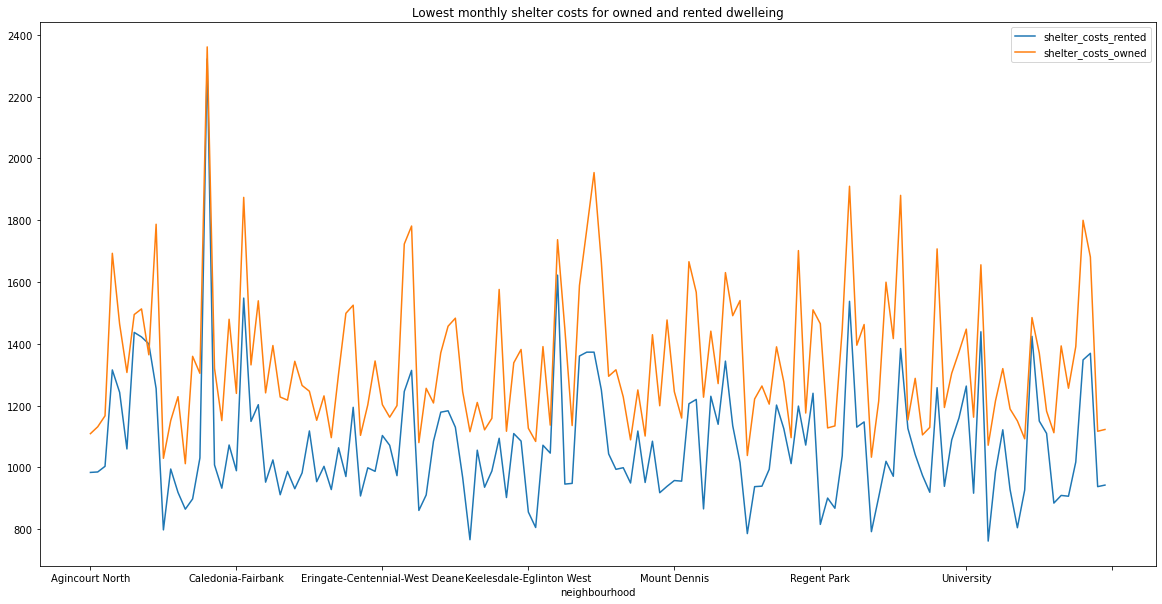

In [43]:
#plot of the monthly shelter costs for owned and rented dwelleing per Neighbourhood
avg_monthly_cost = GTA_data[['shelter_costs_rented', 'shelter_costs_owned']].groupby(["neighbourhood"]).mean()
avg_monthly_cost.plot(figsize=(20, 10), title="Lowest monthly shelter costs for owned and rented dwelleing")
